# 2020 U.S General Election - An introductory EDA

<p><img src="https://media-eng.dhakatribune.com/uploads/2020/06/bigstock-illustration-of-election-357906857-1592827070539.jpg">

This project is an exploratory data analysis on polls from multiple sources with regards to their choice of candidate for the next president of the United States up till 18th September 2020 (date of publish)

The datasets for this analysis are obtained from "fivethirthyeight", which is updated on a daily basis from their 40000 model simulations on forecasting the U.S general election for 2020. 

You can check out their github repo for more details on each available dataset with its details on the columns of the dataset : https://github.com/fivethirtyeight/data/tree/master/election-forecasts-2020

In addition, they have a customized interactive website, where you can check out their interactive visualizations and comments on their forecast for the next general election: https://projects.fivethirtyeight.com/2020-election-forecast/

For this EDA, columns that refer to the incumbent (inc) will be referred to as "Donald Trump" and columns that refer to the challenger (chal) will be referred to as "Joe Biden".

Note that Fivethirthyeight's model simulations mainly rely on state polls, combining with demographic and economic data for forecast. 

If you're interested in looking into the details and source of those national polling averages, refer to this website for more info: https://projects.fivethirtyeight.com/polls/president-general/national/

## Index (Click to redirect section):
* [Data Pre-processing](#Data-Pre-processing)
* [Data Cleaning](#Data-Cleaning)
* [Probability distribution for electoral college votes](#Probability-distribution-for-the-estimated-winning-number-of-electoral-college-votes)
* [Likelihood of Election Outcomes](#Summary-of-Likelihood-of-2020-U.S-Election-Outcomes)
* [Impact of Economy on Election Outcomes](#Impact-of-U.S-economy-on-Election-Outcomes)
* [Which state is most likely to deliver the decisive vote in Electoral College?](#Which-state-is-most-likely-to-deliver-the-decisive-vote-in-Electoral-College?)
* [Which states of voters provide high influence on determining the next U.S president?](#Which-states-of-voters-provide-high-influence-on-determining-the-next-U.S-president?)
* [Which states that Donald Trump and Joe Biden are very favourable by voters and which states are considered as "swing states"?](#Which-states-that-Donald-Trump-and-Joe-Biden-are-very-favourable-by-voters-and-which-states-are-considered-as-"swing-states"?)
* [Which states will improve the chances of either candidate winning electoral majority?](#Which-states-will-improve-the-chances-of-either-candidate-winning-electoral-majority?)
* [Which states that each candidate has seen biggest improvement in terms of popularity?](#Which-states-that-each-candidate-has-seen-biggest-improvement-in-terms-of-popularity?)
* [Conclusion](#Conclusion)

## Data Pre-processing

In [1]:
#Import pandas, matplotlib, seaborn, folium, json and numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json

#Remove warnings when using "choropleth" module for map visualization
import warnings
warnings.filterwarnings('ignore')

#Loading csv data into data frames and setting modeldate column as datetime index
top_national = pd.read_csv('presidential_national_toplines_2020.csv', parse_dates=['modeldate'], index_col='modeldate')
top_states = pd.read_csv('presidential_state_toplines_2020.csv', parse_dates=['modeldate'], index_col='modeldate')
EC_forecast = pd.read_csv('presidential_ev_probabilities_2020.csv', parse_dates=['modeldate'], index_col='modeldate')
Elec_outcome = pd.read_csv('presidential_scenario_analysis_2020.csv', parse_dates=['modeldate'], index_col='modeldate')
econ_index = pd.read_csv('economic_index.csv', parse_dates=['modeldate'])

## Data Cleaning

A quick summary for the process of cleaning the dataset:
1. Remove columns that are not relevant for data analysis (i.e variables related to third party candidates are removed, since the data is empty for those columns)
2. Cleaning string data for "scenario_description" column by removing unwanted characters
3. Encoding data for several columns into categorical data.

In [2]:
def col_remove(df):
    for data in df:
        #Remove columns that are irrelevant for data analysis
        data.drop(['cycle','branch','model','timestamp','simulations','candidate_inc','candidate_chal'], axis=1, inplace=True)
        for item in data.columns:
            #Remove columns from each data frame that relates to third party candidate data
            if str(item).count('3rd')==1:
                data.drop(item, axis=1, inplace=True)
        #Display first five rows of each data frame
        display(data.head())
        #Summary of each data frame
        data.info()

In [3]:
col_remove([top_national,top_states, EC_forecast, Elec_outcome, econ_index])

,ecwin_inc,ecwin_chal,ec_nomajority,popwin_inc,popwin_chal,ev_inc,ev_chal,ev_inc_hi,ev_chal_hi,ev_inc_lo,...,nat_voteshare_other,national_voteshare_inc_hi,national_voteshare_chal_hi,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo
modeldate,,,,,,,,,,,,,,,,,,,,,
2020-09-18,0.227250,0.768000,0.004750,0.127675,0.872325,207.7489,330.2510,316,428.0,110.0,...,1.303142,49.80641,56.64479,1.993226,42.06271,48.88648,0.698785,141000000.0,151000000.0,131000000.0
2020-09-17,0.236800,0.757900,0.005300,0.134000,0.866000,209.9885,328.0115,319,426.0,112.0,...,1.306233,49.90779,56.57381,1.995845,42.11573,48.77401,0.697736,141000000.0,151000000.0,131000000.0
2020-09-16,0.233525,0.760775,0.005700,0.135200,0.864800,208.9003,329.0998,318,428.0,110.0,...,1.303264,49.93647,56.61147,1.992312,42.07764,48.76082,0.689833,141000000.0,151000000.0,131000000.0
2020-09-15,0.237650,0.757575,0.004775,0.133750,0.866250,208.3900,329.6100,321,429.0,109.0,...,1.304130,49.91407,56.70913,1.988386,41.97375,48.79145,0.697407,141000000.0,151000000.0,131000000.0
2020-09-14,0.239225,0.755925,0.004850,0.136150,0.863850,208.9357,329.0644,321,428.0,110.0,...,1.301532,49.95798,56.73676,1.989021,41.97170,48.73645,0.695465,141000000.0,151000000.0,131000000.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2020-09-18 to 2020-06-01
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ecwin_inc                   110 non-null    float64
 1   ecwin_chal                  110 non-null    float64
 2   ec_nomajority               110 non-null    float64
 3   popwin_inc                  110 non-null    float64
 4   popwin_chal                 110 non-null    float64
 5   ev_inc                      110 non-null    float64
 6   ev_chal                     110 non-null    float64
 7   ev_inc_hi                   110 non-null    int64  
 8   ev_chal_hi                  110 non-null    float64
 9   ev_inc_lo                   110 non-null    float64
 10  ev_chal_lo                  110 non-null    int64  
 11  national_voteshare_inc      110 non-null    float64
 12  national_voteshare_chal     110 non-null    float64
 13  nat_voteshare_ot

,state,tipping,vpi,winstate_inc,winstate_chal,voteshare_inc,voteshare_chal,voteshare_other,voteshare_inc_hi,voteshare_chal_hi,...,margin,margin_hi,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo
modeldate,,,,,,,,,,,,,,,,,,,,,
2020-09-18,Wyoming,0.000050,0.030076,0.998300,0.001700,68.42249,28.23502,3.342483,74.93108,34.72366,...,40.187480,52.946660,27.24927,0.227612,0.985294,0.999890,0.002181,257318.9,300243.5,215807.5
2020-09-18,Wisconsin,0.102862,4.790459,0.204125,0.795875,46.50447,52.51715,0.978380,51.22248,57.19916,...,-6.012686,3.406048,-15.35328,0.846663,0.927187,0.760506,0.960840,3045941.0,3442659.0,2655993.0
2020-09-18,West Virginia,0.000013,0.002400,0.992975,0.007025,66.05932,32.11582,1.824860,73.14001,39.34269,...,33.943490,48.075900,19.51700,0.228631,0.967971,0.999010,0.008854,686321.3,796278.0,581987.5
2020-09-18,Washington,0.001613,0.064858,0.009225,0.990775,36.63031,61.11137,2.258324,42.58228,67.02782,...,-24.481060,-12.611830,-36.23160,0.674797,0.772173,0.027393,0.996159,3571344.0,4054395.0,3099236.0
2020-09-18,Virginia,0.013763,0.463774,0.042450,0.957550,43.73746,55.22771,1.034829,47.92540,59.37992,...,-11.490240,-3.125771,-19.79217,0.959364,0.800298,0.179208,0.997819,4216405.0,4770224.0,3677925.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6160 entries, 2020-09-18 to 2020-06-01
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     6160 non-null   object 
 1   tipping                   6160 non-null   float64
 2   vpi                       6160 non-null   float64
 3   winstate_inc              6160 non-null   float64
 4   winstate_chal             6160 non-null   float64
 5   voteshare_inc             6160 non-null   float64
 6   voteshare_chal            6160 non-null   float64
 7   voteshare_other           6160 non-null   float64
 8   voteshare_inc_hi          6160 non-null   float64
 9   voteshare_chal_hi         6160 non-null   float64
 10  voteshare_other_hi        6160 non-null   float64
 11  voteshare_inc_lo          6160 non-null   float64
 12  voteshare_chal_lo         6160 non-null   float64
 13  voteshare_other_lo        6160 non-null   flo

,evprob_inc,evprob_chal,total_ev
modeldate,,,
2020-09-18,0.001775,0.000025,99
2020-09-18,0.001650,0.000075,98
2020-09-18,0.002250,0.000050,97
2020-09-18,0.001875,0.000000,96
2020-09-18,0.001050,0.000000,95


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 539 entries, 2020-09-18 to 2020-09-18
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   evprob_inc   539 non-null    float64
 1   evprob_chal  539 non-null    float64
 2   total_ev     539 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 16.8 KB


,scenario_id,probability,scenario_description
modeldate,,,
2020-09-18,9,0.822750,Biden majority (at least 50 percent of the vote)
2020-09-18,8,0.088875,Trump majority (at least 50 percent of the vote)
2020-09-18,6,0.103262,Biden wins popular vote but loses Electoral Co...
2020-09-18,5,0.001313,Trump wins popular vote but loses Electoral Co...
2020-09-18,4,0.872325,Biden wins popular vote


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430 entries, 2020-09-18 to 2020-06-01
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   scenario_id           1430 non-null   int64  
 1   probability           1430 non-null   float64
 2   scenario_description  1430 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 44.7+ KB


,modeldate,current_zscore,projected_zscore,projected_hi,projected_lo,category,indicator
0,2020-09-18,0.694924,0.607198,1.251617,-0.037220,stock market,S&P 500
1,2020-09-18,-1.979027,-1.431318,-0.786900,-2.075737,spending,Personal consumption expenditures
2,2020-09-18,-1.625910,-1.182447,-0.538029,-1.826866,manufacturing,Industrial production
3,2020-09-18,-3.260423,-2.728775,-2.084357,-3.373194,jobs,Nonfarm payrolls
4,2020-09-18,0.602567,0.668852,1.313270,0.024433,inflation,Consumer price index


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   modeldate         770 non-null    datetime64[ns]
 1   current_zscore    770 non-null    float64       
 2   projected_zscore  770 non-null    float64       
 3   projected_hi      770 non-null    float64       
 4   projected_lo      770 non-null    float64       
 5   category          770 non-null    object        
 6   indicator         770 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 42.2+ KB


In [4]:
#Quick inspection on missing values for win_EC_if_win_state_inc variable
top_states[top_states['win_EC_if_win_state_inc'].isnull()]

,state,tipping,vpi,winstate_inc,winstate_chal,voteshare_inc,voteshare_chal,voteshare_other,voteshare_inc_hi,voteshare_chal_hi,...,margin,margin_hi,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo
modeldate,,,,,,,,,,,,,,,,,,,,,
2020-09-18,District of Columbia,0.0,0.0,0.0,1.0,5.712106,90.81145,3.476441,8.454918,93.92683,...,-85.09934,-79.34082,-90.54978,NaN,0.768000,0.0,1.0,329075.3,414545.0,246443.5
2020-09-17,District of Columbia,0.0,0.0,0.0,1.0,5.727751,90.79065,3.481597,8.468816,93.90102,...,-85.06290,-79.24792,-90.47930,NaN,0.757900,0.0,1.0,328509.3,413195.5,246196.5
2020-09-16,District of Columbia,0.0,0.0,0.0,1.0,5.801128,90.70764,3.491233,8.535843,93.85046,...,-84.90651,-79.13202,-90.36583,NaN,0.760775,0.0,1.0,328384.5,413376.0,245800.5
2020-09-15,District of Columbia,0.0,0.0,0.0,1.0,5.792795,90.71119,3.496018,8.500936,93.84431,...,-84.91840,-79.23006,-90.37047,NaN,0.757575,0.0,1.0,328551.9,414747.5,245701.5
2020-09-14,District of Columbia,0.0,0.0,0.0,1.0,5.799178,90.71823,3.482590,8.488425,93.83423,...,-84.91905,-79.18564,-90.32678,NaN,0.755925,0.0,1.0,328648.2,414126.5,245647.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,District of Columbia,0.0,0.0,0.0,1.0,6.040336,90.34800,3.611668,10.262100,94.66018,...,-84.30766,-75.62791,-92.19669,NaN,0.692525,0.0,1.0,NaN,NaN,NaN
2020-06-07,District of Columbia,0.0,0.0,0.0,1.0,6.029230,90.38129,3.589480,10.175420,94.69842,...,-84.35206,-75.74496,-92.26079,NaN,0.693500,0.0,1.0,NaN,NaN,NaN
2020-06-06,District of Columbia,0.0,0.0,0.0,1.0,6.030996,90.38386,3.585144,10.167260,94.70929,...,-84.35287,-75.82103,-92.26811,NaN,0.690850,0.0,1.0,NaN,NaN,NaN


## Note on missing values
1. National and state turnout variables have missing values, given these estimates are only available on model runs after September 5th. 

2. On closer inspection, variable "win_EC_if_win_state_inc" have 84 missing values. Reason for this is model estimates that the probability of Donald Trump winning the "District of Columbia" is 0, given that Joe Biden has won the popular vote for District of Columbia Democratic presidential primary in June 2020.

In [5]:
#Checking if scenario description have any unwanted characters
Elec_outcome['scenario_description'].unique()

array(['Biden majority (at least 50 percent of the vote)',
       'Trump majority (at least 50 percent of the vote)',
       'Biden wins popular vote but loses Electoral College',
       'Trump wins popular vote but loses Electoral College',
       'Biden wins popular vote', 'Trump wins popular vote',
       'Recount (1+ decisive states within 0.5 ppt)',
       'Electoral College deadlock (No candidate gets 270 electoral votes)',
       'Biden wins at least one state Trump won in 2016',
       'Trump wins at least one state Clinton won in 2016',
       'Map exactly the same as in 2016',
       'Biden landslide (double-digit popular vote margin)',
       'Trump landslide (double-digit popular vote margin)',
       'Recount\xa0(1+ decisive states within 0.5 ppt)',
       'Electoral College deadlock\xa0(No candidate gets 270 electoral votes)',
       'Biden landslide\xa0(double-digit popular vote margin)',
       'Trump landslide\xa0(double-digit popular vote margin)'],
      dtype=object

In [6]:
#Replace non-ASCII character "\xa0" with space
Elec_outcome['scenario_description'] = Elec_outcome['scenario_description'].map(lambda x: x.replace("\xa0", " "))
Elec_outcome['scenario_description'].unique()

array(['Biden majority (at least 50 percent of the vote)',
       'Trump majority (at least 50 percent of the vote)',
       'Biden wins popular vote but loses Electoral College',
       'Trump wins popular vote but loses Electoral College',
       'Biden wins popular vote', 'Trump wins popular vote',
       'Recount (1+ decisive states within 0.5 ppt)',
       'Electoral College deadlock (No candidate gets 270 electoral votes)',
       'Biden wins at least one state Trump won in 2016',
       'Trump wins at least one state Clinton won in 2016',
       'Map exactly the same as in 2016',
       'Biden landslide (double-digit popular vote margin)',
       'Trump landslide (double-digit popular vote margin)'], dtype=object)

In [7]:
def category_conv(df, *args):
    for item in args:
        #setting column of a specified data frame as categorical data type
        df[item]=df[item].astype('category')
    return df.info()

In [8]:
category_conv(top_states,'state')
print('')
category_conv(Elec_outcome,'scenario_id','scenario_description')
print('')
category_conv(econ_index,'category','indicator')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6160 entries, 2020-09-18 to 2020-06-01
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   state                     6160 non-null   category
 1   tipping                   6160 non-null   float64 
 2   vpi                       6160 non-null   float64 
 3   winstate_inc              6160 non-null   float64 
 4   winstate_chal             6160 non-null   float64 
 5   voteshare_inc             6160 non-null   float64 
 6   voteshare_chal            6160 non-null   float64 
 7   voteshare_other           6160 non-null   float64 
 8   voteshare_inc_hi          6160 non-null   float64 
 9   voteshare_chal_hi         6160 non-null   float64 
 10  voteshare_other_hi        6160 non-null   float64 
 11  voteshare_inc_lo          6160 non-null   float64 
 12  voteshare_chal_lo         6160 non-null   float64 
 13  voteshare_other_lo        6160

## Probability distribution for the estimated winning number of electoral college votes

From the latest model simulation on 17th September 2020, we can visualize the overall probability distribution of number of electoral college votes between Donald Trump and Joe Biden.

In [9]:
#Sorting values of total electoral votes in ascending order
EC_forecast.sort_values(by='total_ev',inplace=True)

#Display row with the most likely outcome of winning electoral college votes for Donald Trump
max_prob_inc = EC_forecast.sort_values(by='evprob_inc',ascending=False).head(1)
display(max_prob_inc)

#Display row with the most likely outcome of winning electoral college votes for Joe Biden
max_prob_chal = EC_forecast.sort_values(by='evprob_chal',ascending=False).head(1)
max_prob_chal

,evprob_inc,evprob_chal,total_ev
modeldate,,,
2020-09-18,0.028325,0.00005,125


,evprob_inc,evprob_chal,total_ev
modeldate,,,
2020-09-18,0.00005,0.028325,413


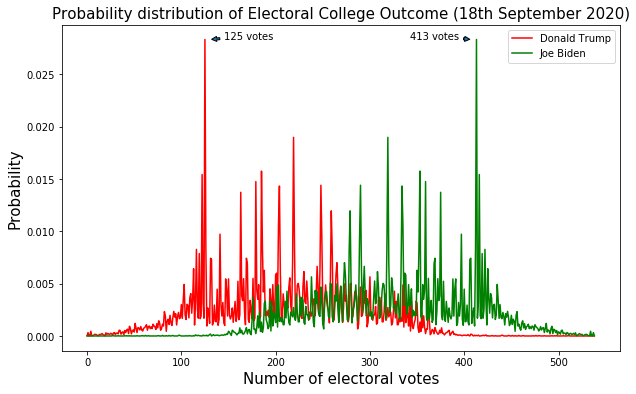

In [10]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(EC_forecast.total_ev, EC_forecast.evprob_inc,color='r',label='Donald Trump')
plt.plot(EC_forecast.total_ev, EC_forecast.evprob_chal,color='g',label='Joe Biden')
plt.legend()
plt.title('Probability distribution of Electoral College Outcome (18th September 2020)',fontsize=15)
plt.xlabel('Number of electoral votes',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.annotate(s='125 votes', xy=[max_prob_inc['total_ev']+5, max_prob_inc['evprob_inc']],
            arrowprops={'arrowstyle': 'simple'}, xytext=[max_prob_inc['total_ev']+20, max_prob_inc['evprob_inc']])
plt.annotate(s='413 votes', xy=[max_prob_chal['total_ev']-5, max_prob_chal['evprob_chal']],
            arrowprops={'arrowstyle': 'simple'}, xytext=[max_prob_chal['total_ev']-70, max_prob_chal['evprob_chal']])
plt.show()

## Summary of Likelihood of 2020 U.S Election Outcomes

From the shape of both probability distributions, Joe Biden has higher chance to win majority of electoral college votes (413 vs 125).

Now, let's have a look at a summary of the likelihood of each possible U.S election outcome for 2020.

In [11]:
#Sorting values of data frame by probability based on latest model simulation ('2020-09-17')
latest_elec_outcome = Elec_outcome['2020-09-18'].sort_values(['probability'], ascending=False)
latest_elec_outcome

,scenario_id,probability,scenario_description
modeldate,,,
2020-09-18,14,0.916250,Biden wins at least one state Trump won in 2016
2020-09-18,4,0.872325,Biden wins popular vote
2020-09-18,9,0.822750,Biden majority (at least 50 percent of the vote)
2020-09-18,13,0.377900,Trump wins at least one state Clinton won in 2016
2020-09-18,11,0.299200,Biden landslide (double-digit popular vote mar...
2020-09-18,3,0.127675,Trump wins popular vote
2020-09-18,6,0.103262,Biden wins popular vote but loses Electoral Co...
2020-09-18,8,0.088875,Trump majority (at least 50 percent of the vote)
2020-09-18,2,0.050050,Recount (1+ decisive states within 0.5 ppt)


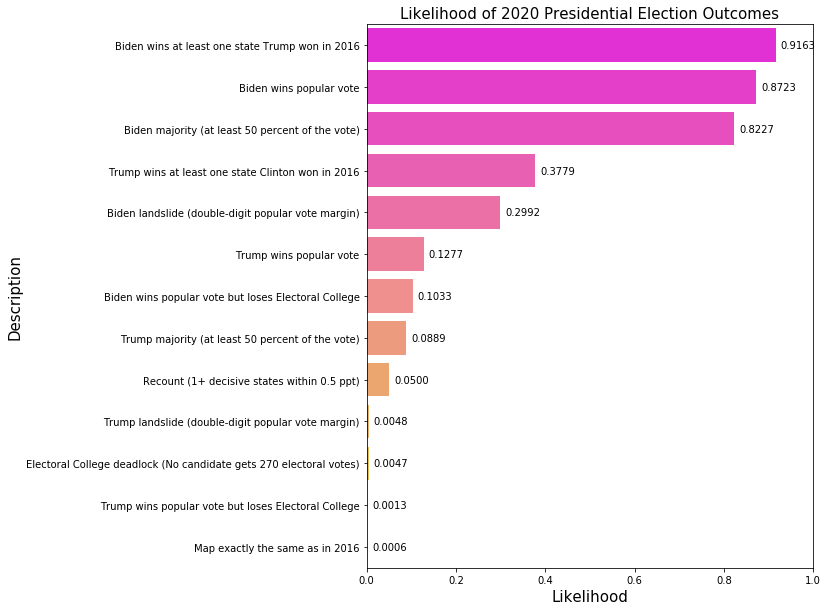

In [12]:
plt.rcParams["figure.figsize"] = (8,10)
ax = sns.barplot(y='scenario_description', x='probability', data=latest_elec_outcome, 
                 order=latest_elec_outcome['scenario_description'], palette='spring')
plt.title('Likelihood of 2020 Presidential Election Outcomes',fontsize=15)
plt.xlabel("Likelihood",fontsize=15)
plt.ylabel("Description",fontsize=15)
plt.xlim(0,1)

rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for positive and negative values.
plt.show()

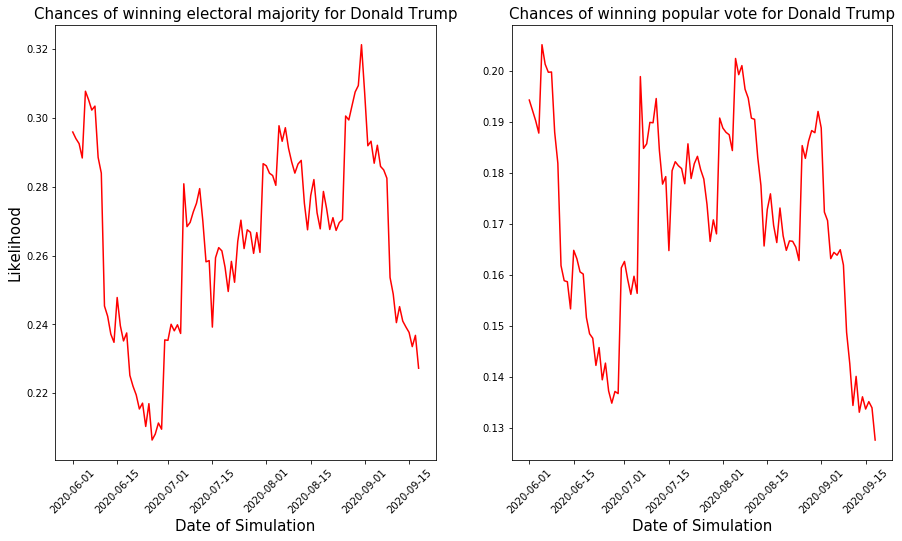

In [13]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots(1,2,sharex=True)

ax[0].plot(top_national.index,top_national.ecwin_inc,color='r')
ax[0].set_title('Chances of winning electoral majority for Donald Trump',fontsize=15)
ax[0].set_ylabel('Likelihood', fontsize=15)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Date of Simulation',fontsize=15)

ax[1].plot(top_national.index,top_national.popwin_inc,color='r')
ax[1].set_title('Chances of winning popular vote for Donald Trump',fontsize=15)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('Date of Simulation',fontsize=15)

plt.show()

## Impact of U.S economy on Election Outcomes

Unsurprisingly, previous figures further support the prediction that Joe Biden is very highly likely to win both popularity and electoral college vote by more than 80%.

We can also observe that the model simulation over time shows that Donald Trump's chances of winning both electoral majority and popular vote is declining to less than 25% and 14% respectively.

Moving on, we can visualize the trend of several U.S economy indicators over time. The purpose of this exploratory analysis is to investigate the potential relationship between U.S economy performance and the likelihood of winning presidential elections.

An article is available which further explains about the purpose of using several key economy indicators for model simulation run by fivethirthyeight:
https://fivethirtyeight.com/features/measuring-the-effect-of-the-economy-on-elections/

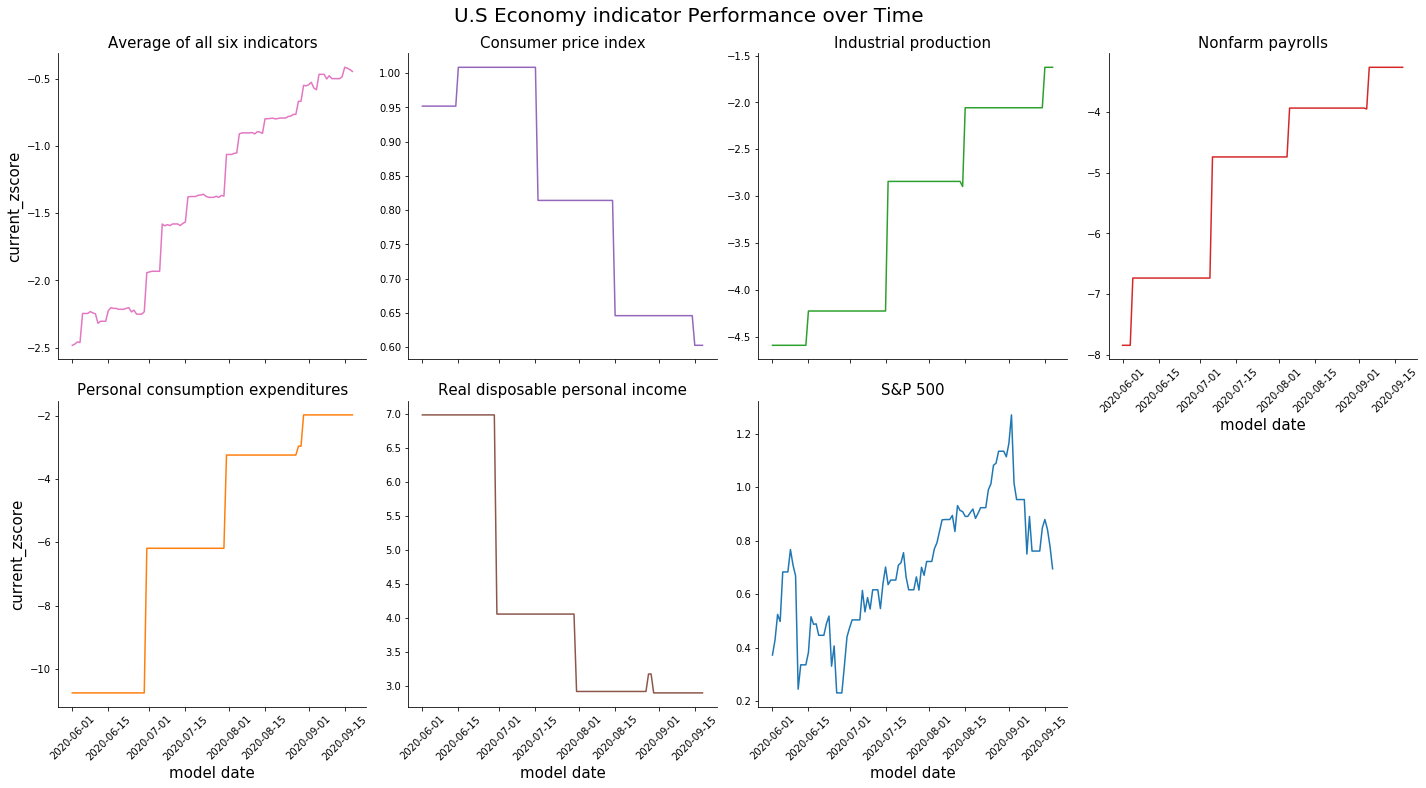

In [14]:
plt.rcParams["figure.figsize"] = (12,12)
g= sns.relplot(x='modeldate',y='current_zscore',data=econ_index,col='indicator',kind='line',col_wrap=4, 
               hue='indicator',facet_kws={'sharey': False})
g.set_titles("{col_name}",size=15)
g.set_xlabels('model date', fontsize=15)
g.set_ylabels(fontsize=15)
g.fig.suptitle('U.S Economy indicator Performance over Time',x=0.42,y=1.03, fontsize=20)
g.set_xticklabels(rotation=45)
g._legend.remove()
plt.show()

## Which state is most likely to deliver the decisive vote in Electoral College?

From the previous figures, the reason that the model predicts Joe Biden is most likely to win majority of Electoral college votes could be due to our observation that most of the U.S economy indicators used by the model is on negative levels (indicating a potential recession). Most noticeably, there was a huge drop in real disposable personal income due to the global pandemic, resulting in a rise of unemployment rates. 

An economy that does not perform well may result in voters more likely to support the opposing party, which may explain why majority of the polls show that the public favours Joe Biden over Donald Trump.

Another useful analysis to look at is identifying which state has the highest chance of delivering the decisive vote of electing the next President of the United States based on latest model simulation. Some individuals may be interested in knowing this information because individuals who live in those states may raise awareness on the importance of their votes, which helps in making a difference for determine the outcome of the upcoming general election.

For this part and subsequent parts of the exploratory data analysis, I will be utilizing JSON file (us-states.json) that has all the list of states in U.S, which can be obtained from this link : https://github.com/python-visualization/folium/tree/master/examples/data

In [15]:
#Quick overview of top 5 states with the highest chance of delivering decisive vote at Electoral College
top_states['2020-09-18'].sort_values(by='tipping',ascending=False)[['state','tipping']].head()

,state,tipping
modeldate,,
2020-09-18,Pennsylvania,0.319825
2020-09-18,Florida,0.134775
2020-09-18,Wisconsin,0.102862
2020-09-18,Arizona,0.065175
2020-09-18,Michigan,0.062537


In [16]:
# loading JSON file for states in U.S
with open('us-states.json') as f:
  state_geo = json.load(f)

# Initialize the map:
m = folium.Map(location=[40, -100], zoom_start=4.5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=top_states['2020-09-18'],
 columns=['state', 'tipping'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Tipping',
    highlight=True
)
folium.LayerControl().add_to(m)
m

## Which states of voters provide high influence on determining the next U.S president?

From the latest model simulation, Pennsylvania has the highest probability of being the state that determines the outcome of electoral college votes (~32%), which is significantly greater than Florida having the 2nd highest probability at around 14%. While voters in Pennsylvania may be the deciding factor of the upcoming election outcome, this could still probably change over time closer to election date in November.

On another aspect, we can also analyse states of voters that have high influence on the outcome of the U.S elections through a useful indicator, known as voting power index (VPI)

In [17]:
#Quick overview of top 5 states of voters with the highest influence on election outcomes
top_states['2020-09-18'].sort_values(by='vpi',ascending=False)[['state','vpi']].head()

,state,vpi
modeldate,,
2020-09-18,Pennsylvania,7.245113
2020-09-18,NE-2,4.814578
2020-09-18,Wisconsin,4.790459
2020-09-18,New Hampshire,4.537138
2020-09-18,Nevada,4.472139


In [18]:
# Initialize the map:
m = folium.Map(location=[40, -100], zoom_start=4.5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=top_states['2020-09-18'],
 columns=['state', 'vpi'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Voting Power Index',
    highlight=True
)
folium.LayerControl().add_to(m)
m

## Which states that Donald Trump and Joe Biden are very favourable by voters and which states are considered as "swing states"?

Similar to tipping indicator, voters in Pennsylvania also has the highest voting power index (7.2), followed by Wisconsin (4.8), Nevada (4.5) and New Hampshire (4.5). 

On closer inspection with the next figure, these states are currently in favour of Joe Biden being the next President with margins of less than 10%, such that voters in these states may provide significant contribution towards Joe Biden's chances of winning the electoral majority. However, with a fairly small margin, Trump may be able to regain his popularity from those states as well closer to election date.

Speaking of margins, people outside of U.S may be interested in knowing which candidate is popular for certain states in U.S to get a better overview on the public's opinion about the upcoming election. In addition, people may find it entertaining to know which states have voters that are very competitive about their preference for the next President of the United States.

In [19]:
# Quick overview on number of states potentially won by each candidate
latest_margin = top_states['2020-09-18'].sort_values(by='margin',ascending=False)[['state','margin']]
latest_margin['pred_winner'] = latest_margin['margin']>0
latest_margin['pred_winner'] = latest_margin['pred_winner'].map(lambda x: 'trump' if x else 'biden')
latest_margin.groupby('pred_winner')['state'].count()

pred_winner
biden    29
trump    27
Name: state, dtype: int64

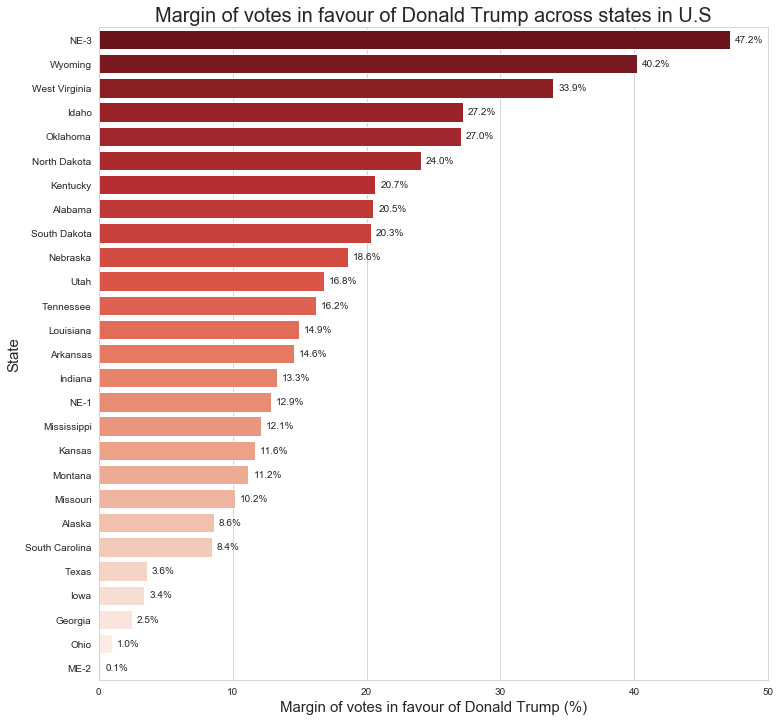

In [20]:
sns.set_style('whitegrid')
g= sns.barplot(y='state',x='margin',data=latest_margin[latest_margin['margin']>0],
               order=latest_margin[latest_margin['margin']>0]['state'], palette='Reds_r')
g.set_xlabel("Margin of votes in favour of Donald Trump (%)", fontsize=15)
g.set_ylabel("State", fontsize=15)
g.set_title("Margin of votes in favour of Donald Trump across states in U.S", fontsize=20)
g.set_xticks([50,40,30,20,10,0])

rects = g.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)+"%"

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for positive and negative values.
plt.show()

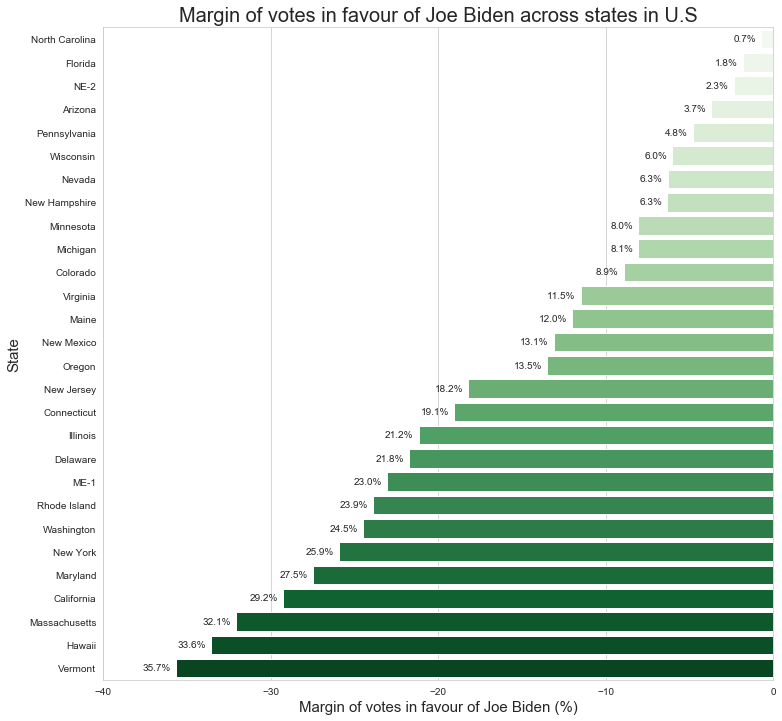

In [21]:
sns.set_style('whitegrid')
g= sns.barplot(y='state',x='margin',data=latest_margin[(latest_margin['margin']<0) & (latest_margin['margin']>-40)],
               order=latest_margin[(latest_margin['margin']<0) & (latest_margin['margin']>-40)]['state'],palette='Greens')
g.set_xlabel("Margin of votes in favour of Joe Biden (%)", fontsize=15)
g.set_ylabel("State", fontsize=15)
g.set_title("Margin of votes in favour of Joe Biden across states in U.S", fontsize=20)
g.set_xticks([-40,-30,-20,-10,0])
rects = g.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value*-1)+"%"

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for positive and negative values.
plt.show()

## Which states will improve the chances of either candidate winning electoral majority?

Both charts above show that Donald Trump is quite popular amongst voters in NE-3, Wyoming and West Virginia with margin of votes greater than 30%. Biden on the other hand is quite popular amongst voters in Vermont, Hawaii and Massachusetts with margin of votes also greater than 30%. 

States such as ME-2, Ohio, Georgia, North Carolina, Florida and NE-2 have margin of votes less than 3% for both candidates, such that voters in these "swing" states do not have a clear majority of preference for either candidate over the past several elections.

It will certainly be interesting to watch the election outcomes on these "swing" states closer to election date with both candidates trying to convince voters on choosing them for the next U.S president.

In general, candidates that win popularity vote on certain states may not necessarily win the electoral majority. Therefore, we can investigate which states that are predicted to win by certain candidates improve their chances of getting the majority of electoral votes.

In [22]:
#Top 10 states that will improve chances of Trump winning electoral college
top_states['2020-09-18'].sort_values(by='win_EC_if_win_state_inc',ascending=False)\
[['state','win_EC_if_win_state_inc','margin','winstate_inc']].head(10)

,state,win_EC_if_win_state_inc,margin,winstate_inc
modeldate,,,,
2020-09-18,Delaware,0.961039,-21.752880,0.001925
2020-09-18,Virginia,0.959364,-11.490240,0.042450
2020-09-18,Illinois,0.955882,-21.164300,0.003400
2020-09-18,Michigan,0.951688,-8.054442,0.123675
2020-09-18,Connecticut,0.924908,-19.053140,0.013650
2020-09-18,Rhode Island,0.912234,-23.891030,0.009400
2020-09-18,Minnesota,0.871888,-8.035626,0.130550
2020-09-18,New York,0.868421,-25.914010,0.000950
2020-09-18,New Mexico,0.850784,-13.099470,0.058975


In [23]:
#Top 10 statest that will improve chances of Biden winning electoral college
top_states['2020-09-18'].sort_values(by='win_EC_if_win_state_chal',ascending=False)\
[['state','win_EC_if_win_state_chal','margin','winstate_chal']].head(10)

,state,win_EC_if_win_state_chal,margin,winstate_chal
modeldate,,,,
2020-09-18,NE-3,1.000000,47.153750,0.000200
2020-09-18,Texas,0.998942,3.610276,0.307200
2020-09-18,Indiana,0.998275,13.321660,0.043475
2020-09-18,Iowa,0.997815,3.419921,0.331775
2020-09-18,Kansas,0.997767,11.645850,0.067175
2020-09-18,Ohio,0.997252,0.983608,0.445775
2020-09-18,Nebraska,0.996016,18.588540,0.012550
2020-09-18,Missouri,0.994951,10.161620,0.099025
2020-09-18,South Carolina,0.994741,8.433112,0.123600


## Which states that each candidate has seen biggest improvement in terms of popularity?

In general, either candidate that manages to turn the odds against them by winning states that are more clearly popular for the opposing candidate certainly improves their chances on winning electoral college. However, it was interesting to note that Joe Biden has the upper hand on regaining popularity from certain states like Ohio with 99% chance of winning electoral majority, given there is 44% chance of winning popularity vote for Ohio with a very low margin of 1%. 

Donald Trump may have the disadvantage on that matter, given he could potentially obtain popularity vote from voters in Pennsylvania. He will have 85% chance of winning electoral majority if he wins popularity vote for Pennsylvania with only 23% probability and a margin of 4.8%.

However, this current prediction may change over time closer to election date based on model simulations.

Given model simulations have been carried out since June 1st to current date, it will be interesting to know which candidate has gain more popularity in certain states over the past 4 months.

In [24]:
latest = top_states['2020-09-18'][['state','winstate_inc','winstate_chal']]
earliest = top_states['2020-06-01'][['state','winstate_inc','winstate_chal']]
# Merging data frames based on "state" key for probability comparison between values on different simulation dates.
comparison = pd.merge(latest, earliest, on='state', suffixes=['_0918','_0601'])

In [25]:
comparison['diff_inc'] = comparison['winstate_inc_0918']-comparison['winstate_inc_0601']
display(comparison[['state','diff_inc']].sort_values(by='diff_inc',ascending=False).head().reset_index(drop=True))

comparison['diff_chal'] = comparison['winstate_chal_0918']-comparison['winstate_chal_0601']
comparison[['state','diff_chal']].sort_values(by='diff_chal',ascending=False).head().reset_index(drop=True)

,state,diff_inc
0,Georgia,0.056875
1,Indiana,0.045075
2,Missouri,0.038400
3,Utah,0.022575
4,Tennessee,0.020475


,state,diff_chal
0,Arizona,0.129650
1,Minnesota,0.104750
2,ME-2,0.092250
3,Maine,0.083925
4,Wisconsin,0.083250


In [26]:
# Initialize the map:
m = folium.Map(location=[40, -100], zoom_start=4.5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=comparison,
 columns=['state', 'diff_inc'],
 key_on='feature.properties.name',
 fill_color='RdBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Improvement in probability of Trump winning state',
    highlight=True,
)
folium.LayerControl().add_to(m)
m

## Conclusion

So, Joe Biden seems to gain more popularity amongst people in Arizona and Minnesota by more than 10% of improvement, compared to Donald Trump who only manages to gain popularity amongst people living in Indiana, Georgia and Missouri between 3 to 6% of improvement. Based on all figures shown in this notebook, Joe Biden certainly seems like the more likely candidate to win in the upcoming general election. 

Given there has been lots of controversies and criticisms about the manner in which Donald Trump handles the U.S pandemic, "Black lives matter" protest and the trade deal between Oracle and Tik tok, things certainly do not seem to be in favour of him.

In my opinion, his pledge on getting approval for Covid-19 vaccine prior to election day is something the public should observe on. If he indeed manages to fulfill his pledge on that matter, the people of United States may provide more support towards him for continue to be the President for another 4 years. Otherwise, this situation will only put more favour in Joe Biden.

### That sums up my exploratory data analysis about the model predictions made by "fivethirtyeight". Credits are given to them for conducting these model simulations and updating the datasets on a daily basis. And thanks for taking the time to look at my project, which I hope you find it insightful.